In [2]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import requests
import koreanize_matplotlib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/1456289/big_data_set1_f.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/1456289/big_data_set2_f.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/1456289/big_data_set3_f.csv', encoding='cp949')
bus = pd.read_excel('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/bus.xlsx')
subway = pd.read_csv('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/subway.csv',  encoding='cp949')
subway_num = pd.read_csv('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/subway_num.csv',  encoding='cp949')

# 전처리

## 주소 기반 행정동/좌표 매핑

카카오맵 API 활용

In [ ]:
import requests

url = "https://dapi.kakao.com/v2/local/search/address.json"  # 요청할 url 주소
headers = {"Authorization": "KakaoAK "}  # REST API 키
query = {"query": "종로구 서린동 70 알파빌딩"}  # 검색할 주소

result = requests.get(url, headers=headers, params=query).json()
print(result)


{'documents': [{'address': {'address_name': '서울 종로구 서린동 70', 'b_code': '1111012300', 'h_code': '1111061500', 'main_address_no': '70', 'mountain_yn': 'N', 'region_1depth_name': '서울', 'region_2depth_name': '종로구', 'region_3depth_h_name': '종로1.2.3.4가동', 'region_3depth_name': '서린동', 'sub_address_no': '', 'x': '126.981109768533', 'y': '37.5698456599116'}, 'address_name': '서울 종로구 서린동 70', 'address_type': 'REGION_ADDR', 'road_address': {'address_name': '서울 종로구 종로 34', 'building_name': '알파빌딩', 'main_building_no': '34', 'region_1depth_name': '서울', 'region_2depth_name': '종로구', 'region_3depth_name': '서린동', 'road_name': '종로', 'sub_building_no': '', 'underground_yn': 'N', 'x': '126.98111033501', 'y': '37.5698436778123', 'zone_no': '03188'}, 'x': '126.981109768533', 'y': '37.5698456599116'}], 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}


In [ ]:
import requests
import pandas as pd
import time

url = "https://dapi.kakao.com/v2/local/search/address.json"
headers = {"Authorization": "KakaoAK a1f27edc63b02884de4a063c7a00f1e9"}

results = []

for i, addr in enumerate(df['MCT_BSE_AR']):
    query = {"query": addr}
    res = requests.get(url, headers=headers, params=query).json()

    if res.get("documents"):
        doc = res['documents'][0]
        address_info = doc.get("address") or doc.get("road_address")

        if address_info:
            results.append({
                "region_3depth_h_name": address_info.get("region_3depth_h_name"),
                "region_3depth_name": address_info.get("region_3depth_name"),
                "x": address_info.get("x"),
                "y": address_info.get("y")
            })
        else:
            print(f"주소 정보 없음 → {addr}")   # 로그 출력
            results.append({
                "region_3depth_h_name": None,
                "region_3depth_name": None,
                "x": None,
                "y": None
            })
    else:
        print(f"검색 결과 없음 → {addr}")   # 로그 출력
        results.append({
            "region_3depth_h_name": None,
            "region_3depth_name": None,
            "x": None,
            "y": None
        })

    if i % 100 == 0:
        print(f"{i}번째 처리 완료")

    time.sleep(0.1)

df_geo = pd.DataFrame(results)
df2 = pd.concat([df.reset_index(drop=True), df_geo], axis=1)


0번째 처리 완료
100번째 처리 완료
검색 결과 없음 → 서울 성동구 행당로 38
검색 결과 없음 → 서울 성동구 매봉길 13.
200번째 처리 완료
300번째 처리 완료
400번째 처리 완료
500번째 처리 완료
검색 결과 없음 → 서울 성동구 천호대로 276
600번째 처리 완료
700번째 처리 완료
검색 결과 없음 → 서울 성동구 용답중앙길 12
800번째 처리 완료
900번째 처리 완료
검색 결과 없음 → 서울 성동구 왕십리로30길 8
1000번째 처리 완료
1100번째 처리 완료
1200번째 처리 완료
1300번째 처리 완료
1400번째 처리 완료
1500번째 처리 완료
1600번째 처리 완료
1700번째 처리 완료
검색 결과 없음 → 서울 성동구 왕십리로26길 2-1.
검색 결과 없음 → 서울 성동구 자동차시장1길 82.
검색 결과 없음 → 서울 성동구 자동차시장1길 90.
1800번째 처리 완료
1900번째 처리 완료
2000번째 처리 완료
2100번째 처리 완료
검색 결과 없음 → 서울 성동구 왕십리로24길 16-1.
2200번째 처리 완료
2300번째 처리 완료
2400번째 처리 완료
2500번째 처리 완료
2600번째 처리 완료
2700번째 처리 완료
검색 결과 없음 → 서울  성동구  자동차시장1길  82
2800번째 처리 완료
2900번째 처리 완료
3000번째 처리 완료
검색 결과 없음 → 서울특별시 성동구 용답25다길 23
검색 결과 없음 → 서울특별시 성동구 용답25다길 23
3100번째 처리 완료
검색 결과 없음 → 서울특별시 성동구 용답중앙길 78
3200번째 처리 완료
3300번째 처리 완료
3400번째 처리 완료
3500번째 처리 완료
3600번째 처리 완료
검색 결과 없음 → 서울특별시 성동구 마장로40길 11-1
3700번째 처리 완료
3800번째 처리 완료
3900번째 처리 완료
4000번째 처리 완료
4100번째 처리 완료
검색 결과 없음 → 서울특별시 성동구 왕십리로31가길 10-2


In [ ]:
df2.to_csv('location_processing.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/location_processing.csv', header=None)

In [ ]:
df1 = df1.drop(df1.columns[0], axis=1)
df1.columns = list(df.columns) + ["region_3depth_h_name", "region_3depth_name", "x", "y"]

df1.head(2)

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,MCT_SIGUNGU_NM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,region_3depth_h_name,region_3depth_name,x,y
0,16184E93D9,서울 성동구 마장동,성우**,NaN,서울 성동구,축산물,마장동,20130320,NaN,마장동,마장동,127.045326,37.56638
1,4D039EA8B7,서울 성동구 마장동,대보**,NaN,서울 성동구,축산물,마장동,20131122,NaN,마장동,마장동,127.045326,37.56638


## 전처리

데이터 클렌징 : 성동구 외 삭제

In [ ]:
df1['MCT_BSE_AR'].apply(lambda x: x.split()[0] if isinstance(x, str) and x else None).value_counts()

,count
MCT_BSE_AR,
서울특별시,2787
서울,1397
경기,1


In [ ]:
df1['MCT_BSE_AR'].apply(lambda x: x.split()[1] if isinstance(x, str) and x else None).value_counts()

,count
MCT_BSE_AR,
성동구,4183
강남구,1
동두천시,1


In [ ]:
df1 = df1[~df1['MCT_BSE_AR'].apply(lambda x: isinstance(x, str) and x.split()[0] == '경기')]
df1 = df1[~df1['MCT_BSE_AR'].apply(lambda x: isinstance(x, str) and x.split()[1] == '동두천시')]

칼럼 삭제

In [ ]:
df1 = df1.drop(columns=['MCT_SIGUNGU_NM']) # 모든 데이터가 '서울 성동구' 임

세 데이터 합치기

In [ ]:
df_12 = pd.merge(
    df1,
    df2,
    on="ENCODED_MCT",  # df1에는 TA_YM이 없으므로 ENCODED_MCT만 기준으로 우선 병합
    how="left"
)

# 2) df_12와 df3 병합 (ENCODED_MCT와 TA_YM 기준)
df = pd.merge(
    df_12,
    df3,
    on=["ENCODED_MCT", "TA_YM"],  # df3에는 TA_YM이 있으므로 함께 매칭
    how="left"
)

# 결과 확인
print(df.shape)
print(df.head())


(86566, 41)
  ENCODED_MCT  MCT_BSE_AR MCT_NM MCT_BRD_NUM HPSN_MCT_ZCD_NM  \
0  16184E93D9  서울 성동구 마장동   성우**         NaN             축산물   
1  16184E93D9  서울 성동구 마장동   성우**         NaN             축산물   
2  16184E93D9  서울 성동구 마장동   성우**         NaN             축산물   
3  16184E93D9  서울 성동구 마장동   성우**         NaN             축산물   
4  16184E93D9  서울 성동구 마장동   성우**         NaN             축산물   

  HPSN_MCT_BZN_CD_NM     ARE_D  MCT_ME_D region_3depth_h_name  \
0                마장동  20130320       NaN                  마장동   
1                마장동  20130320       NaN                  마장동   
2                마장동  20130320       NaN                  마장동   
3                마장동  20130320       NaN                  마장동   
4                마장동  20130320       NaN                  마장동   

  region_3depth_name  ...  M12_FME_1020_RAT  M12_FME_30_RAT  M12_FME_40_RAT  \
0                마장동  ...            1.9520           4.256          5.2160   
1                마장동  ...            2.6136           

NAN 처리

In [ ]:
# 결측치 처리
cols_to_replace = [
    "DLV_SAA_RAT",
    "M12_SME_BZN_ME_MCT_RAT",
    "M12_MAL_1020_RAT",
    "M12_MAL_30_RAT",
    "M12_MAL_40_RAT",
    "M12_MAL_50_RAT",
    "M12_MAL_60_RAT",
    "M12_FME_1020_RAT",
    "M12_FME_30_RAT",
    "M12_FME_40_RAT",
    "M12_FME_50_RAT",
    "M12_FME_60_RAT",
    "MCT_UE_CLN_REU_RAT",
    "MCT_UE_CLN_NEW_RAT",
    "RC_M1_SHC_RSD_UE_CLN_RAT",
    "RC_M1_SHC_WP_UE_CLN_RAT",
    "RC_M1_SHC_FLP_UE_CLN_RAT"
]

df[cols_to_replace] = df[cols_to_replace].replace(-999999.9, np.nan)


폐업 여부 변수 생성

In [ ]:
# 폐업 했니 안 했니
df['is_closed'] = np.where(df['MCT_ME_D'].notnull(), True, False)

날짜 변수 생성 및 데이터 타입 변환

In [ ]:
ta_ym_str = df['TA_YM'].astype(str)

df['year'] = ta_ym_str.str[:4].astype(int)
df['month'] = ta_ym_str.str[4:].astype(int)

df['YM'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

print(df[['TA_YM','year','month','YM']].head())

    TA_YM  year  month         YM
0  202405  2024      5 2024-05-01
1  202304  2023      4 2023-04-01
2  202308  2023      8 2023-08-01
3  202402  2024      2 2024-02-01
4  202406  2024      6 2024-06-01


In [ ]:
# 개설일 변환
df['start'] = pd.to_datetime(df['ARE_D'], format='%Y%m%d')

# 폐업일 변환
df['end'] = pd.to_datetime(
    df['MCT_ME_D'].dropna().astype(int), format='%Y%m%d'
)

# NaN 있던 위치 복원
df.loc[df['MCT_ME_D'].isna(), 'end'] = pd.NaT

## 업종 대분류

데이터 변수명 변경

In [ ]:
mapping_dict = {
    "ENCODED_MCT": "store_id",
    "MCT_BSE_AR": "store_address",
    "MCT_NM": "store_name",
    "MCT_BRD_NUM": "brand_code",
    "MCT_SIGUNGU_NM": "store_region",
    "HPSN_MCT_ZCD_NM": "industry",
    "HPSN_MCT_BZN_CD_NM": "business_district",
    "ARE_D": "open_date",
    "MCT_ME_D": "close_date",
    "TA_YM": "ref_year_month",
    "MCT_OPE_MS_CN": "operation_months_range",
    "RC_M1_SAA": "sales_amount_range",
    "RC_M1_TO_UE_CT": "sales_count_range",
    "RC_M1_UE_CUS_CN": "unique_customers_range",
    "RC_M1_AV_NP_AT": "avg_spending_range",
    "APV_CE_RAT": "cancel_rate_range",
    "DLV_SAA_RAT": "delivery_sales_ratio",
    "M1_SME_RY_SAA_RAT": "industry_sales_ratio",
    "M1_SME_RY_CNT_RAT": "industry_sales_count_ratio",
    "M12_SME_RY_SAA_PCE_RT": "industry_sales_rank_ratio",
    "M12_SME_BZN_SAA_PCE_RT": "district_sales_rank_ratio",
    "M12_SME_RY_ME_MCT_RAT": "industry_closure_ratio",
    "M12_SME_BZN_ME_MCT_RAT": "district_closure_ratio",
    "M12_MAL_1020_RAT": "male_20_under_ratio",
    "M12_MAL_30_RAT": "male_30_ratio",
    "M12_MAL_40_RAT": "male_40_ratio",
    "M12_MAL_50_RAT": "male_50_ratio",
    "M12_MAL_60_RAT": "male_60_over_ratio",
    "M12_FME_1020_RAT": "female_20_under_ratio",
    "M12_FME_30_RAT": "female_30_ratio",
    "M12_FME_40_RAT": "female_40_ratio",
    "M12_FME_50_RAT": "female_50_ratio",
    "M12_FME_60_RAT": "female_60_over_ratio",
    "MCT_UE_CLN_REU_RAT": "returning_customer_ratio",
    "MCT_UE_CLN_NEW_RAT": "new_customer_ratio",
    "RC_M1_SHC_RSD_UE_CLN_RAT": "resident_customer_ratio",
    "RC_M1_SHC_WP_UE_CLN_RAT": "worker_customer_ratio",
    "RC_M1_SHC_FLP_UE_CLN_RAT": "floating_customer_ratio"
}


df = df.rename(columns=mapping_dict)

전체 업종에 대한 대분류 매핑

In [ ]:
# 전체 업종에 대한 대분류 매핑
category_map_complete = {
    # 한식
      '한식-찌개/전골':'한식-일반', '한식-국밥/설렁탕':'한식-일반', '한식-감자탕':'한식-일반',
      '한식-죽':'한식-일반', '한식-두부요리':'한식-일반', '한식뷔페':'한식-일반', '한정식':'한식-일반',
    '한식-도시락':'한식-일반', '기사식당':'한식-일반', '도시락':'한식-일반', '분식':'한식-일반',

      '백반/가정식':'한식-백반/가정식',

      '한식-단품요리일반':'한식-단품요리일반',

      '한식-국수/만두':'한식-면/만두', '한식-냉면':'한식-면/만두',

      '한식-육류/고기':'한식-육류/고기',

      '한식-해물/생선':'한식-해물/생선',


    # 중식 (그대로)
    '중식-딤섬/중식만두':'중식', '중식-훠궈/마라탕':'중식', '중식당':'중식',


    # 일식 (그대로)
    '일식-우동/소바/라면':'일식', '일식-덮밥/돈가스':'일식', '일식-초밥/롤':'일식',
    '일식-샤브샤브':'일식', '일식-참치회':'일식', '일식당':'일식', '이자카야':'일식',
    '꼬치구이':'일식',


    # 양식/패스트푸드
    '피자':'패스트푸드', '치킨':'패스트푸드', '햄버거':'패스트푸드', '샌드위치/토스트':'패스트푸드',

    '양식':'양식', '스테이크':'양식',


    # 세계요리
    '기타세계요리':'세계요리', '동남아/인도음식':'세계요리',


    # 디저트/카페
    '커피전문점':'카페/커피', '카페':'카페/커피', '테마카페':'카페/커피', '테이크아웃커피':'카페/커피',
    '찻집':'카페/커피', '주스':'카페/커피',

    # 제과
    '베이커리':'디저트', '마카롱':'디저트', '와플/크로플':'디저트', '아이스크림/빙수':'디저트',
    '도너츠':'디저트', '떡/한과 제조':'디저트' ,  '탕후루':'디저트',


    # 주류/유흥
    '주류':'주류/술집', '호프/맥주':'주류/술집', '와인샵':'주류/술집', '와인바':'주류/술집',
    '룸살롱/단란주점':'주류/술집', '일반 유흥주점':'주류/술집', '민속주점':'주류/술집', '요리주점':'주류/술집',


    # 식품
    '축산물':'식품', '식품 제조':'식품', '식료품':'식품', '떡/한과 제조':'식품', '떡/한과':'식품',
    '미곡상':'식품', '농산물':'식품', '청과물':'식품', '수산물':'식품', '건어물':'식품', '인삼제품':'식품',
    '건강원':'식품', '건강식품':'식품',
    '유제품':'식품', '반찬':'식품',


    # 기타
    '담배':'기타', '차':'기타', '포장마차':'기타', '구내식당/푸드코트':'기타'
}


df['industry_group'] = df['industry'].map(category_map_complete)
df.loc[df["industry"] == "꼬치구이3", "industry_group"] = "주류"

In [ ]:
df.to_csv('df_0922_ver_2_re.csv')

## 상권 매핑

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/df_0922_ver_2_re.csv')
df.head(2)

,store_id,store_address,store_name,brand_code,industry,business_district,open_date,close_date,ref_year_month,operation_months_range,...,start,end,year,month,YM,region_3depth_h_name,region_3depth_name,x,y,industry_group
0,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,마장동,20130320.0,NaN,202405,2_10-25%,...,2013-03-20,NaN,2024,5,2024-05-01,마장동,마장동,127.045326,37.56638,식품
1,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,마장동,20130320.0,NaN,202304,2_10-25%,...,2013-03-20,NaN,2023,4,2023-04-01,마장동,마장동,127.045326,37.56638,식품


In [ ]:
# 가맹점별로 집계하여 분석용 데이터 생성
store_level_data = df.groupby('store_id').agg({
    'close_date': 'first',  # 폐업일
    'region_3depth_h_name': 'first',  # 행정동
    'region_3depth_name': 'first',  # 법정동
    'x': 'first',  # 경도
    'y': 'first',  # 위도
    'business_district': 'first',  # 상권
    'industry': 'first',  # 업종,,
    'industry_group': 'first', # 업종
    'is_closed': 'first',  # 폐업 여부 (이미 계산됨)
    'industry_sales_rank_ratio': 'mean',  # 순위비율 평균
    'industry_closure_ratio': 'mean',  # 해지비중 평균
    'industry_sales_ratio': 'mean',  # 매출비율 평균
    'industry_sales_count_ratio': 'mean',   # 건수비율 평균
    'district_sales_rank_ratio': 'mean',  # 상권내 순위비율
    'district_closure_ratio': 'mean',   # 상권내 해지비중
    'end': 'first',
}).reset_index()


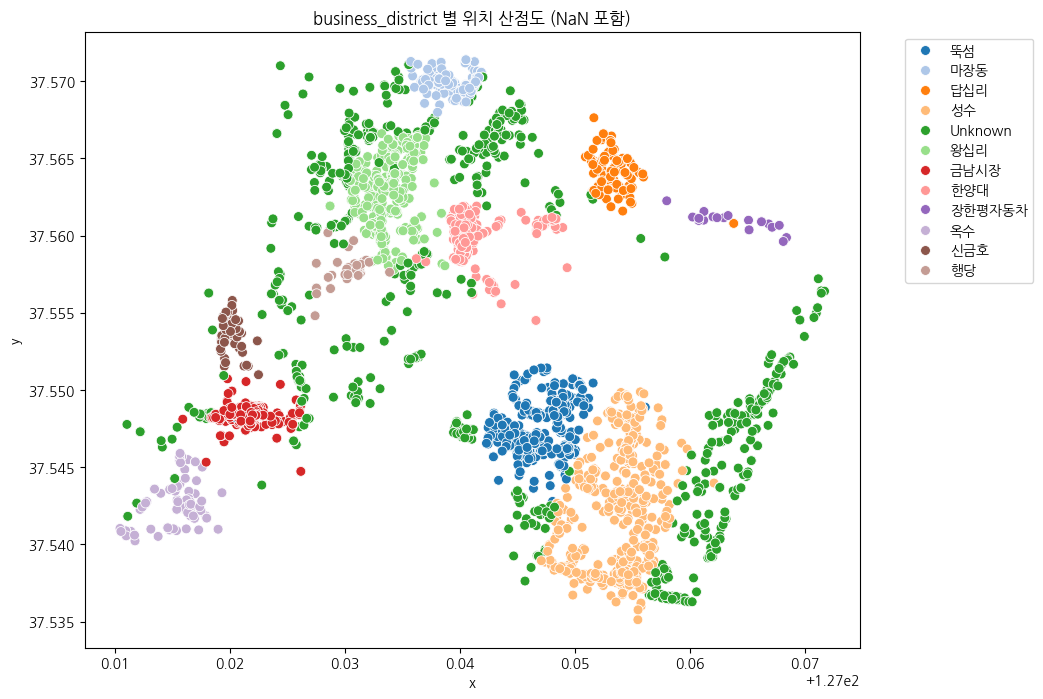

In [ ]:
store_level_data_plot = store_level_data.copy()
store_level_data_plot['business_district'] = store_level_data_plot['business_district'].fillna('Unknown')

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=store_level_data_plot,
    x='x',
    y='y',
    hue='business_district',
    palette='tab20',
    s=50
)
plt.title('business_district 별 위치 산점도 (NaN 포함)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


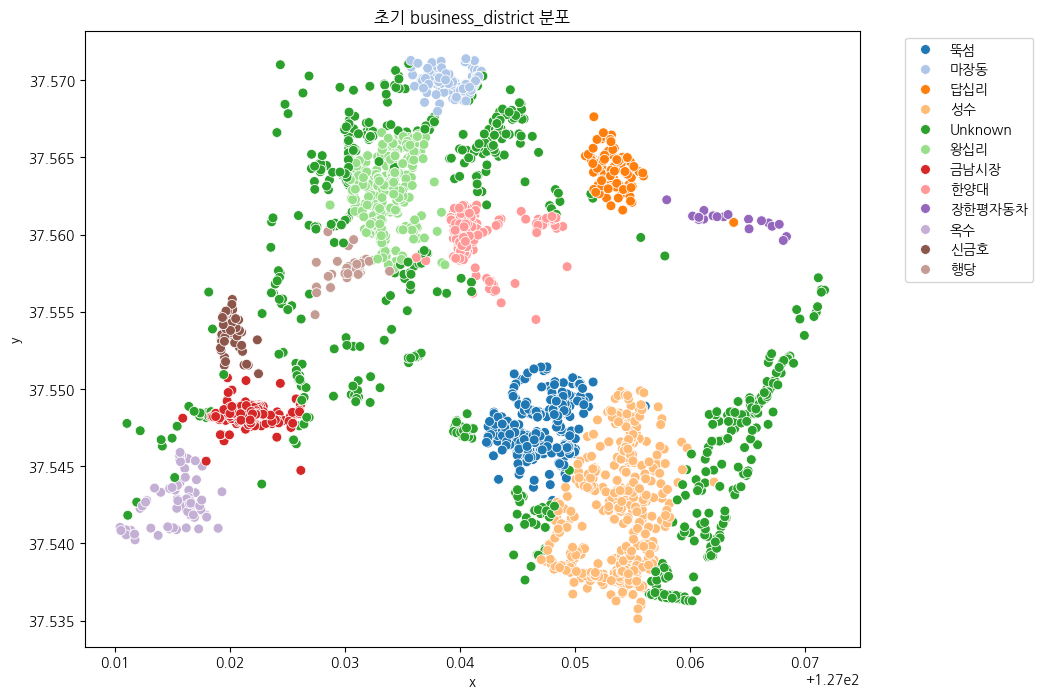

In [ ]:
from sklearn.cluster import DBSCAN

store_level_data_plot = store_level_data.copy()
store_level_data_plot['business_district'] = store_level_data_plot['business_district'].fillna('Unknown')

# 1. 원본 분포 확인
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=store_level_data_plot,
    x='x', y='y',
    hue='business_district',
    palette='tab20', s=50
)
plt.title('초기 business_district 분포')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Unknown만 추출
unknown_points = store_level_data_plot.loc[
    store_level_data_plot['business_district'] == 'Unknown', ['x', 'y']
].to_numpy()

# shape 확인
print(unknown_points.shape)


(1046, 2)


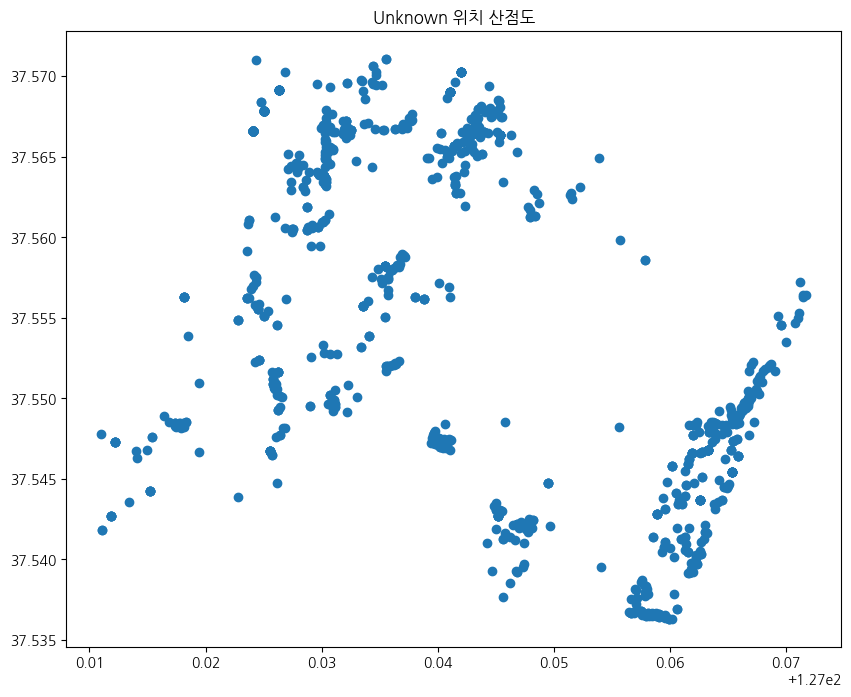

eps=0.002, 군집 라벨 종류: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


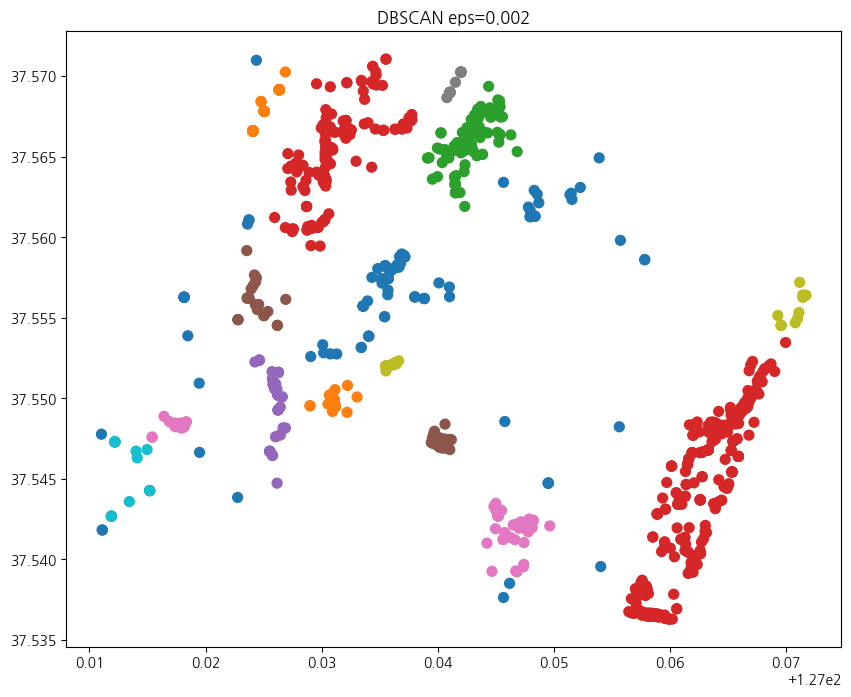

eps=0.003, 군집 라벨 종류: [-1  0  1  2  3  4  5]


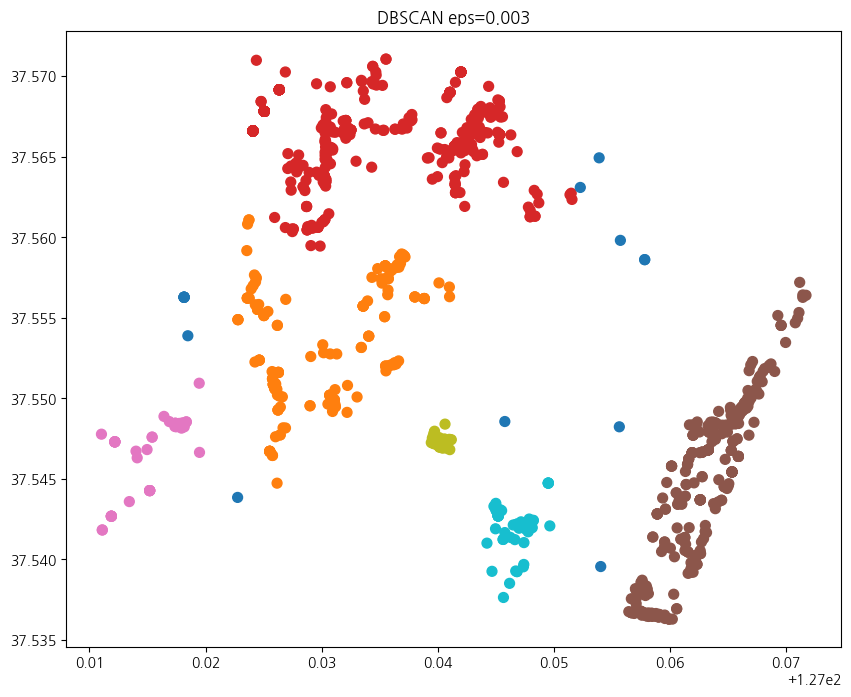

eps=0.004, 군집 라벨 종류: [-1  0  1  2  3  4]


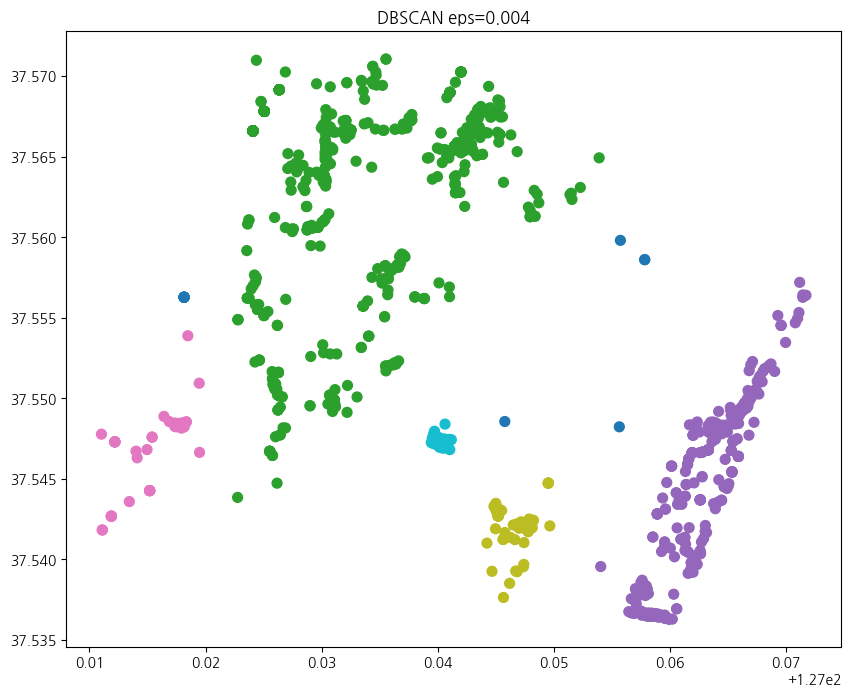

eps=0.005, 군집 라벨 종류: [-1  0  1  2  3]


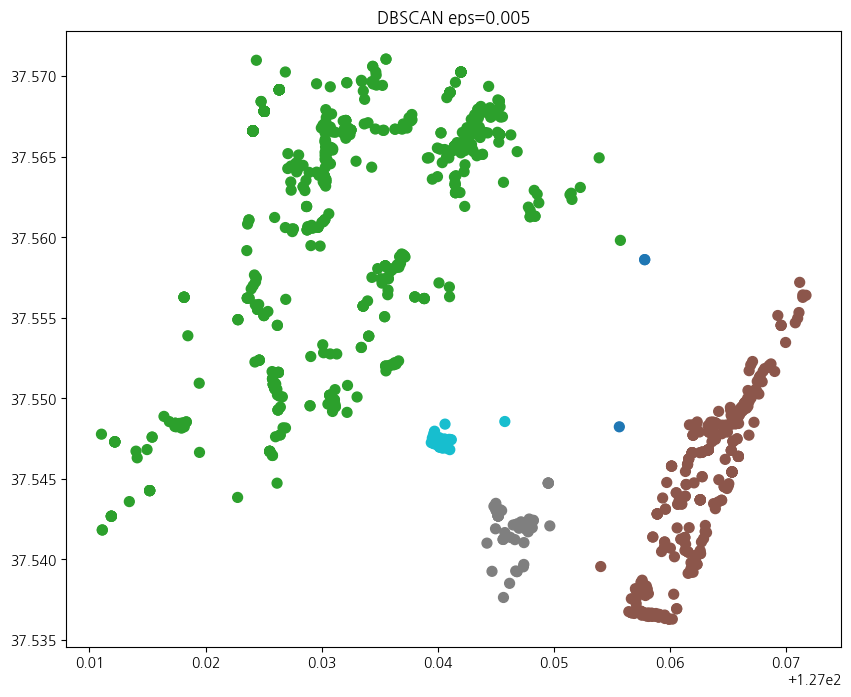

eps=0.06, 군집 라벨 종류: [0]


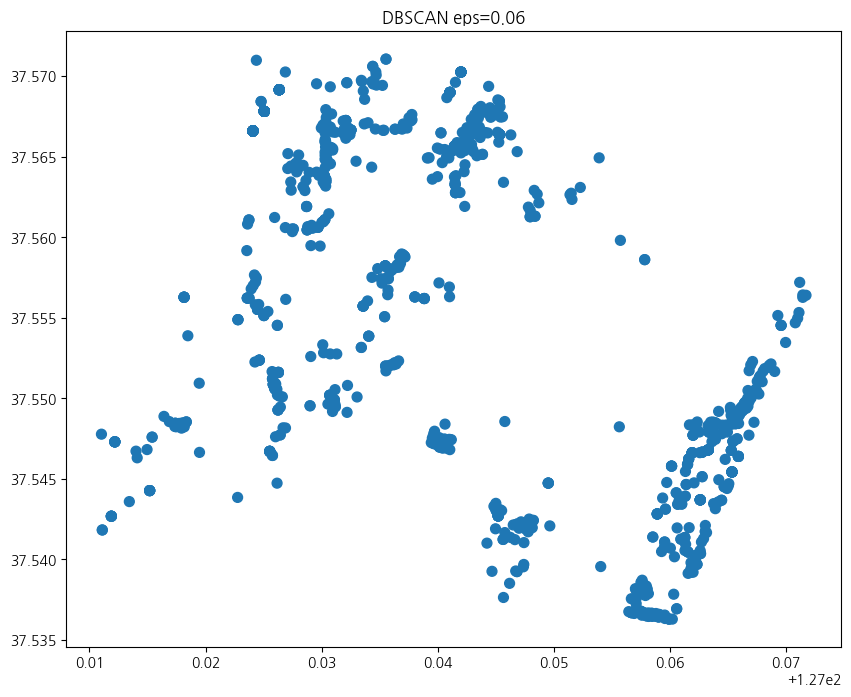

In [ ]:
from sklearn.cluster import DBSCAN

# 1. Unknown 점 산점도 먼저 체크
plt.figure(figsize=(10, 8))
plt.scatter(unknown_points[:, 0], unknown_points[:, 1])
plt.title('Unknown 위치 산점도')
plt.show()

# 2. eps 파라미터를 0.002, 0.004, 0.008 등 여러 번 반복 실험
for eps in [0.002, 0.003, 0.004, 0.005, 0.06]:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(unknown_points)

    print(f"eps={eps}, 군집 라벨 종류: {np.unique(labels)}")
    plt.figure(figsize=(10, 8))
    plt.scatter(unknown_points[:, 0], unknown_points[:, 1], c=labels, cmap='tab10', s=50)
    plt.title(f"DBSCAN eps={eps}")
    plt.show()


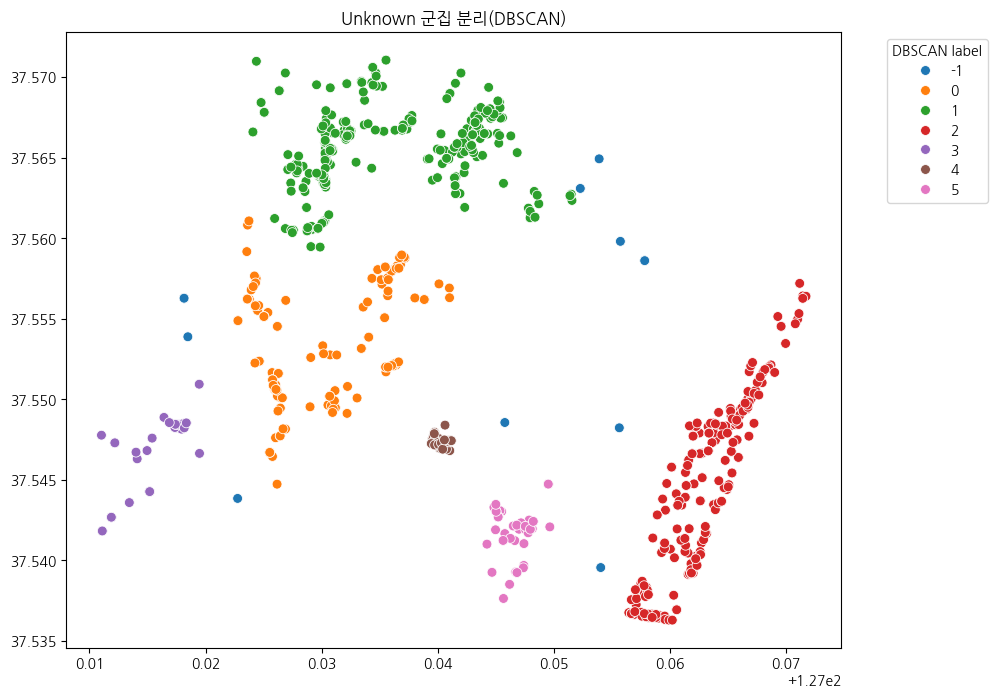

In [ ]:
# 2. Unknown 점 추출 후 DBSCAN 클러스터링
unknown_mask = store_level_data_plot['business_district'] == 'Unknown'
unknown_points = store_level_data_plot.loc[unknown_mask, ['x', 'y']].values

dbscan = DBSCAN(eps=0.003, min_samples=10)
unknown_labels = dbscan.fit_predict(unknown_points)

# 2-1. DBSCAN 결과 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=unknown_points[:, 0], y=unknown_points[:, 1],
    hue=unknown_labels,
    palette='tab10', s=50
)
plt.title('Unknown 군집 분리(DBSCAN)')
plt.legend(title='DBSCAN label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


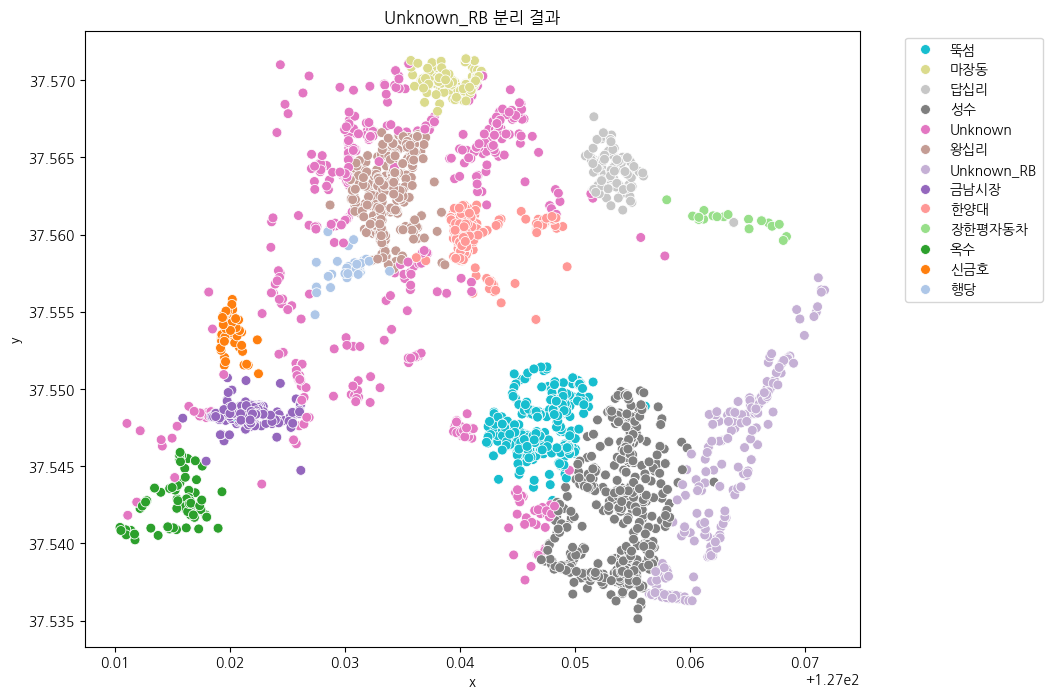

In [ ]:
# 3. 오른쪽 아래 클러스터 분리
right_bottom_cluster = 2

store_level_data_plot.loc[unknown_mask, 'unknown_sub_cluster'] = unknown_labels
rb_mask = (store_level_data_plot['unknown_sub_cluster'] == right_bottom_cluster) & unknown_mask
store_level_data_plot.loc[rb_mask, 'business_district'] = 'Unknown_RB'

# 3-1. 오른쪽 아래 클러스터 분리 결과 시각화
tmp = store_level_data_plot.copy()
tmp['viz_label'] = tmp['business_district']
tmp.loc[rb_mask, 'viz_label'] = 'Unknown_RB'

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=tmp,
    x='x', y='y',
    hue='viz_label',
    palette='tab20_r', s=50
)
plt.title('Unknown_RB 분리 결과')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipython-input-522894669.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])  # 소수점까지 숫자 표시


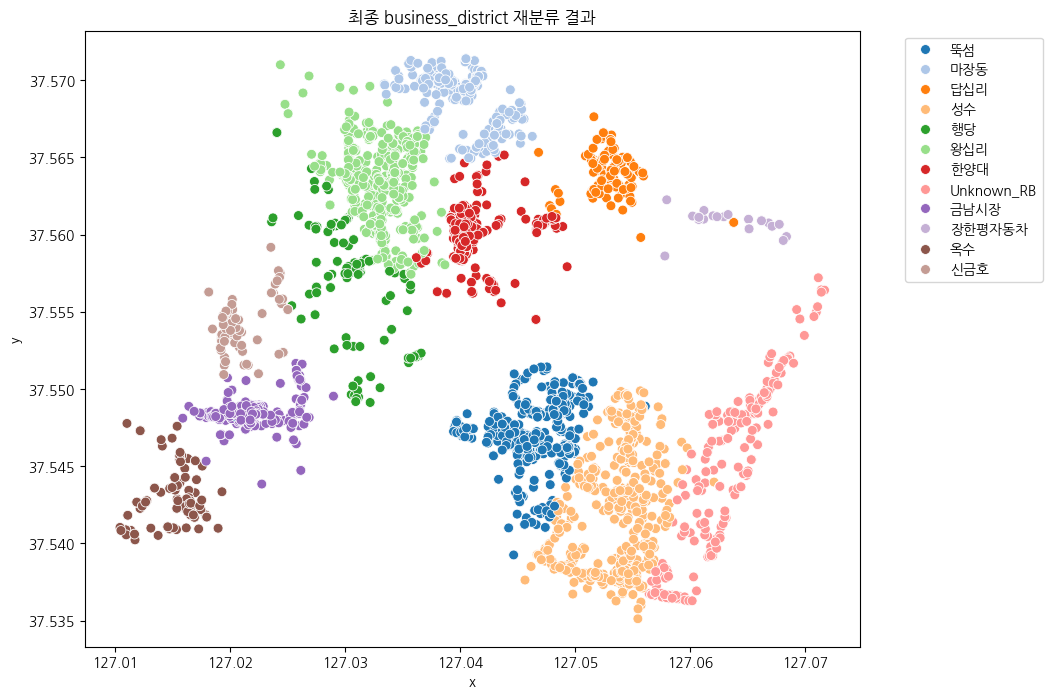

In [ ]:
# 4. 나머지 Unknown 최근접 상권 할당
rest_unknown_mask = (unknown_mask & ~rb_mask)
rest_unknown_points = store_level_data_plot.loc[rest_unknown_mask, ['x', 'y']].values

# 기존 상권 centroid 계산
named = store_level_data_plot[store_level_data_plot['business_district'] != 'Unknown']
cluster_centroids = named.groupby('business_district')[['x', 'y']].mean()

for idx, point in zip(store_level_data_plot[rest_unknown_mask].index, rest_unknown_points):
    dists = np.linalg.norm(cluster_centroids.values - point, axis=1)
    closest = cluster_centroids.index[np.argmin(dists)]
    store_level_data_plot.at[idx, 'business_district'] = closest

# 4-1. 최종 결과 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=store_level_data_plot,
    x='x', y='y',
    hue='business_district',
    palette='tab20', s=50
)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)  # 지수 표기 안 함
plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])  # 소수점까지 숫자 표시
plt.title('최종 business_district 재분류 결과')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
store_level_data_plot.loc[
    (store_level_data_plot['business_district'] == '뚝섬') & (store_level_data_plot['x'] > 127.052),
    'business_district'
] = '성수'

store_level_data_plot.loc[
    (store_level_data_plot['business_district'] == '답십리') & (store_level_data_plot['x'] > 127.06),
    'business_district'
] = '장한평자동차'


/tmp/ipython-input-3036563500.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])  # 소수점까지 숫자 표시


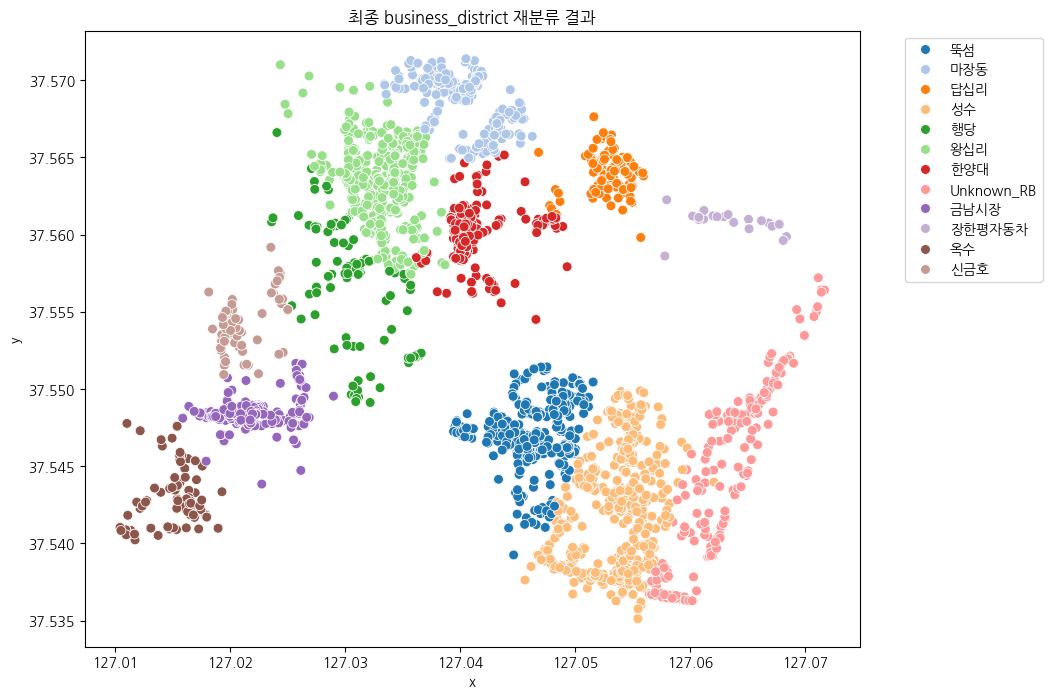

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=store_level_data_plot,
    x='x', y='y',
    hue='business_district',
    palette='tab20', s=50
)
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)  # 지수 표기 안 함
plt.gca().set_xticklabels([f'{x:.2f}' for x in plt.gca().get_xticks()])  # 소수점까지 숫자 표시
plt.title('최종 business_district 재분류 결과')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# df에 적용
df_merged = df.drop(columns=['business_district']).merge(
    store_level_data_plot[['store_id', 'business_district']],
    on='store_id',
    how='left'
)

df = df_merged.copy()


## 외부 데이터 사용
버스/지하철까지의 최단 거리

### 지하철 데이터 전처리

In [ ]:
set1 = set(subway['역사명'])

stations = ['옥수','금호','약수','청구','신금호','행당','응봉','왕십리','마장',
            '한양대','서울숲','뚝섬','성수','용답','한양대','용두','용답','답십리',
            '장한평','군자','어린이대공원','건대입구','자양']

not_in_set1 = [station for station in stations if station not in set1]
print(not_in_set1)

[]


In [ ]:
targets = ['왕십리', '용두', '군자', '어린이대공원', '자양']

found = {t: [name for name in set1 if t in name] for t in targets}
print(found)


{'왕십리': ['왕십리', '상왕십리'], '용두': ['용두'], '군자': ['군자'], '어린이대공원': ['아차산(어린이대공원후문)', '어린이대공원'], '자양': ['자양']}


In [ ]:
targets = ['뚝섬']

found = {t: [name for name in set1 if t in name] for t in targets}
print(found)

# 자양 == 뚝섬유원지

{'뚝섬': ['뚝섬']}


In [ ]:
# 표준역명 매핑 사전
mapping = {
    '왕십리(성동구청)': '왕십리',
    '용두(동대문구청)': '용두',
    '군자(능동)': '군자',
    '어린이대공원(세종대)': '어린이대공원',
    '뚝섬유원지': '자양'
}

# 역사명 정규화
subway['역사명'] = subway['역사명'].replace(mapping)

# 필요한 데이터만 남기기
subway_selected = subway[subway['역사명'].isin(stations)].reset_index()

In [ ]:
set2 = set(subway_num['역명'])

stations = ['옥수','금호','약수','청구','신금호','행당','응봉','왕십리','마장',
            '한양대','서울숲','뚝섬','성수','용답','한양대','용두','용답','답십리',
            '장한평','군자','어린이대공원','건대입구','자양']

not_in_set2 = [station for station in stations if station not in set2]
print(not_in_set2)

[]


In [ ]:
targets = ['왕십리', '용두', '군자', '어린이대공원', '자양']

found = {t: [name for name in set2 if t in name] for t in targets}
print(found)


{'왕십리': ['왕십리', '상왕십리'], '용두': ['용두'], '군자': ['군자'], '어린이대공원': ['아차산(어린이대공원후문)', '어린이대공원'], '자양': ['자양']}


In [ ]:
# 표준역명 매핑 사전
mapping = {
    '왕십리(성동구청)': '왕십리',
    '용두(동대문구청)': '용두',
    '군자(능동)': '군자',
    '어린이대공원(세종대)': '어린이대공원',
    '자양(뚝섬한강공원)': '자양'
}

# 역사명 정규화
subway_num['역명'] = subway_num['역명'].replace(mapping)

# 필요한 데이터만 남기기
subway_num_selected = subway_num[subway_num['역명'].isin(stations)].reset_index()

In [ ]:
subway_num_selected = subway_num_selected.groupby("역명")[["승차총승객수", "하차총승객수"]].mean().reset_index()
subway_num_selected['승하차총승객수'] = subway_num_selected['승차총승객수'] + subway_num_selected['하차총승객수']

In [ ]:
subway_df = pd.merge(
    subway_selected,
    subway_num_selected,
    left_on="역사명",
    right_on="역명",
    how="inner"        # 교집합만
)

subway_df = subway_df[['역명','위도','경도','승하차총승객수']]

### 지하철, 버스로 파생변수 제작

In [ ]:
# 가맹점별 집계
store_level_data = df.groupby('store_id').agg({
    'store_address': 'first',
    'store_name': 'first',
    'brand_code': 'first',
    'industry': 'first',
    'open_date': 'first',
    'close_date': 'first',
    'ref_year_month': 'first',
    'operation_months_range': 'first',
    'sales_amount_range': 'first',
    'sales_count_range': 'first',
    'unique_customers_range': 'first',
    'avg_spending_range': 'first',
    'cancel_rate_range': 'first',
    'delivery_sales_ratio': 'mean',
    'industry_sales_ratio': 'mean',
    'industry_sales_count_ratio': 'mean',
    'industry_sales_rank_ratio': 'mean',
    'district_sales_rank_ratio': 'mean',
    'industry_closure_ratio': 'mean',
    'district_closure_ratio': 'mean',
    'male_20_under_ratio': 'mean',
    'male_30_ratio': 'mean',
    'male_40_ratio': 'mean',
    'male_50_ratio': 'mean',
    'male_60_over_ratio': 'mean',
    'female_20_under_ratio': 'mean',
    'female_30_ratio': 'mean',
    'female_40_ratio': 'mean',
    'female_50_ratio': 'mean',
    'female_60_over_ratio': 'mean',
    'returning_customer_ratio': 'mean',
    'new_customer_ratio': 'mean',
    'resident_customer_ratio': 'mean',
    'worker_customer_ratio': 'mean',
    'floating_customer_ratio': 'mean',
    'is_closed': 'first',
    'start': 'first',
    'end': 'first',
    'year': 'first',
    'month': 'first',
    'YM': 'first',
    'region_3depth_h_name': 'first',
    'region_3depth_name': 'first',
    'x': 'first',
    'y': 'first',
    'industry_group': 'first',
    'business_district': 'first'
}).reset_index()

- 가장 가까운 버스 정류장 정보 추가 (정류소명, X좌표, Y좌표, 거리)
- 가장 가까운 지하철역 정보 추가 (역명, 위도, 경도, 거리, 승하차총승객수)
- 500미터 내에 개수

In [ ]:
# Haversine 함수 정의 (위도/경도 기준 거리 계산, km)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 지구 반지름(km)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# store_level_data 좌표
store_lat = store_level_data['y'].values
store_lon = store_level_data['x'].values

# 버스 정류장 좌표
bus_lat = bus['Y좌표'].values
bus_lon = bus['X좌표'].values

# 지하철 역 좌표
subway_lat = subway_df['위도'].values
subway_lon = subway_df['경도'].values

# --- 가장 가까운 버스 정류장 ---
nearest_bus_name = []
nearest_bus_lat = []
nearest_bus_lon = []
nearest_bus_dist = []

for lat, lon in zip(store_lat, store_lon):
    dists = haversine(lat, lon, bus_lat, bus_lon)
    idx = np.argmin(dists)
    nearest_bus_name.append(bus.loc[idx, '정류소명'])
    nearest_bus_lat.append(bus.loc[idx, 'Y좌표'])
    nearest_bus_lon.append(bus.loc[idx, 'X좌표'])
    nearest_bus_dist.append(dists[idx])

store_level_data['nearest_bus'] = nearest_bus_name
store_level_data['nearest_bus_lat'] = nearest_bus_lat
store_level_data['nearest_bus_lon'] = nearest_bus_lon
store_level_data['nearest_bus_dist_km'] = nearest_bus_dist

# --- 가장 가까운 지하철 역 ---
nearest_sub_name = []
nearest_sub_lat = []
nearest_sub_lon = []
nearest_sub_dist = []
nearest_sub_passengers = []

for lat, lon in zip(store_lat, store_lon):
    dists = haversine(lat, lon, subway_lat, subway_lon)
    idx = np.argmin(dists)
    nearest_sub_name.append(subway_df.loc[idx, '역명'])
    nearest_sub_lat.append(subway_df.loc[idx, '위도'])
    nearest_sub_lon.append(subway_df.loc[idx, '경도'])
    nearest_sub_dist.append(dists[idx])
    nearest_sub_passengers.append(subway_df.loc[idx, '승하차총승객수'])

store_level_data['nearest_subway'] = nearest_sub_name
store_level_data['nearest_subway_lat'] = nearest_sub_lat
store_level_data['nearest_subway_lon'] = nearest_sub_lon
store_level_data['nearest_subway_dist_km'] = nearest_sub_dist
store_level_data['nearest_subway_passengers'] = nearest_sub_passengers


In [ ]:
radius_km = 0.2  # 500m

# 버스 정류장 개수
bus_counts = []
for lat, lon in zip(store_level_data['y'], store_level_data['x']):
    dists = haversine(lat, lon, bus_lat, bus_lon)
    bus_counts.append(np.sum(dists <= radius_km))
store_level_data['bus_200m_count'] = bus_counts

radius_km = 0.5  # 500m

# 지하철 개수
subway_counts = []
for lat, lon in zip(store_level_data['y'], store_level_data['x']):
    dists = haversine(lat, lon, subway_lat, subway_lon)
    subway_counts.append(np.sum(dists <= radius_km))
store_level_data['subway_500m_count'] = subway_counts


In [ ]:
# df 원본 기준으로 store_level_data의 파생변수 붙이기
df = df.merge(
    store_level_data[['store_id',
                      'nearest_bus', 'nearest_bus_lat', 'nearest_bus_lon', 'nearest_bus_dist_km',
                      'nearest_subway', 'nearest_subway_lat', 'nearest_subway_lon', 'nearest_subway_dist_km', 'nearest_subway_passengers',
                      'bus_200m_count', 'subway_500m_count']],
    on='store_id',
    how='left'
)


In [ ]:
df.to_csv('df_0929_ver_1.csv',index=False)

# 모델링 전략

In [8]:
df = pd.read_csv('/content/drive/MyDrive/2025-2/2025 빅콘테스트/data/df_0929_ver_1.csv')

## 매출 구간 변화 분석

In [12]:
import pandas as pd
from scipy.stats import f_oneway, kruskal, chi2_contingency

# YM을 날짜형으로 변환
df['YM'] = pd.to_datetime(df['YM'])

# ============ 업종별 분석 ============
industry_month = (
    df.groupby(['YM', 'industry', 'sales_amount_range'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

industry_month['ratio'] = industry_month.groupby(['YM', 'industry'])['count'].transform(lambda x: x / x.sum())
industry_month = industry_month.sort_values(['industry', 'sales_amount_range', 'YM'])
industry_month['diff'] = industry_month.groupby(['industry', 'sales_amount_range'])['ratio'].diff()
industry_change = industry_month.dropna(subset=['diff']).copy()

# 업종별 통계 검정
groups_industry = [group['diff'].values for name, group in industry_change.groupby('industry')]
f_stat_industry, p_value_industry = f_oneway(*groups_industry)
stat_industry, p_industry = kruskal(*groups_industry)

print("업종별 ANOVA 결과: F =", f_stat_industry, ", p =", p_value_industry)
print("업종별 Kruskal-Wallis 결과: H =", stat_industry, ", p =", p_industry)


# ============ 상권별 분석 ============
district_month = (
    df.groupby(['YM', 'business_district', 'sales_amount_range'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

district_month['ratio'] = district_month.groupby(['YM', 'business_district'])['count'].transform(lambda x: x / x.sum())
district_month = district_month.sort_values(['business_district', 'sales_amount_range', 'YM'])
district_month['diff'] = district_month.groupby(['business_district', 'sales_amount_range'])['ratio'].diff()
district_change = district_month.dropna(subset=['diff']).copy()

# 상권별 통계 검정
groups_district = [group['diff'].values for name, group in district_change.groupby('business_district')]
f_stat_district, p_value_district = f_oneway(*groups_district)
stat_district, p_district = kruskal(*groups_district)

print("상권별 ANOVA 결과: F =", f_stat_district, ", p =", p_value_district)
print("상권별 Kruskal-Wallis 결과: H =", stat_district, ", p =", p_district)

업종별 ANOVA 결과: F = 0.2473702777992572 , p = 0.9999999999918111
업종별 Kruskal-Wallis 결과: H = 14.72213321844335 , p = 0.9999999999999655
상권별 ANOVA 결과: F = 0.0008192397085781837 , p = 0.9999999999999996
상권별 Kruskal-Wallis 결과: H = 0.7691100630928539 , p = 0.9999868989772193


## 폐업 여부 분석

In [13]:
# ============ 카이제곱 검정 ============
# 업종별 폐업
table_industry = pd.crosstab(df['industry'], df['is_closed'])
chi2_industry, p_industry_chi, dof, expected = chi2_contingency(table_industry)
print("업종별 폐업 카이제곱 검정: chi2 =", chi2_industry, ", p =", p_industry_chi)

# 상권별 폐업
table_district = pd.crosstab(df['business_district'], df['is_closed'])
chi2_district, p_district_chi, dof, expected = chi2_contingency(table_district)
print("상권별 폐업 카이제곱 검정: chi2 =", chi2_district, ", p =", p_district_chi)

업종별 폐업 카이제곱 검정: chi2 = 1904.8358432450168 , p = 0.0
상권별 폐업 카이제곱 검정: chi2 = 156.10806785641765 , p = 8.39312799780579e-28
